In [1]:
import pandas as pd
import numpy as np
import time
from math import fabs
import matplotlib.pyplot as pyplot
from sklearn.metrics import classification_report, f1_score
import seaborn as sns
import warnings

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

data = pd.read_csv('covtype.csv')
print('Количество признаков:', len(data.columns))
print('Количество объектов:', len(data))

Количество признаков: 55
Количество объектов: 581012


In [25]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [2]:
data['Cover_Type'] = data['Cover_Type'].astype('category')

In [3]:
data.loc[:, :"Horizontal_Distance_To_Fire_Points"].corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000


In [4]:
from math import sqrt
tmp = data.loc[:, 'Horizontal_Distance_To_Hydrology' : 'Vertical_Distance_To_Hydrology']
optimized_data = data.drop(tmp, axis = 1)
union_distance_data = pd.Series([0 for _ in range(len(data))])
for index in range(len(data)):
    horizontal = data['Horizontal_Distance_To_Hydrology'][index]
    vertical = data['Vertical_Distance_To_Hydrology'][index]
    union_distance_data[index] = sqrt(horizontal**2 + vertical**2)
optimized_data['Distance_To_Hydrology'] = union_distance_data

In [5]:
columns_list = optimized_data.columns.tolist()
columns_list = ['Elevation', 'Aspect', 'Slope','Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
for i in range(1, 5):
    columns_list.append("Wilderness_Area{}".format(i))
for i in range(1, 41):
    columns_list.append("Soil_Type{}".format(i))
columns_list.append('Cover_Type')
optimized_data = optimized_data[columns_list]

In [6]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
normalized_data = optimized_data
tmp = mm_scaler.fit_transform(normalized_data.loc[:, :'Horizontal_Distance_To_Fire_Points'])
normalized_data.loc[:, :'Horizontal_Distance_To_Fire_Points'] = tmp

In [7]:
normalized_data.describe()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213692,0.194400,0.330216,0.835221,0.879208,0.561135,0.276076,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,0.140062,0.310871,0.113458,0.153025,0.219089,0.105393,0.077830,0.150687,0.184608,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475238,0.161111,0.136364,0.076164,0.155403,0.779528,0.838583,0.468504,0.142758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.568784,0.352778,0.196970,0.161495,0.280596,0.858268,0.889764,0.562992,0.238394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.652326,0.722222,0.272727,0.277151,0.467613,0.909449,0.933071,0.661417,0.355500,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [32]:
from sklearn.model_selection import train_test_split

target = normalized_data.Cover_Type
train = normalized_data.drop(['Cover_Type'], axis = 1)
models_results = []

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=16)

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

start_time = time.time()
tree.fit(x_train, y_train)
tree_train_time = time.time() - start_time
print("DecisionTreeClassifier train time = {} seconds".format(tree_train_time))

start_time = time.time()
tree_result = tree.predict(x_test)
tree_predict_time = time.time() - start_time
print("DecisionTreeClassifier predict time = {} seconds".format(tree_predict_time))

tree_model_f1 = f1_score(y_test, tree_result, average='weighted')
print("DecisionTreeClassifier f1 (weighted): ", tree_model_f1)

tree_model_f1_micro = f1_score(y_test, tree_result, average='micro')
print("DecisionTreeClassifier f1 (micro): ", tree_model_f1_micro)

tree_model_f1_macro = f1_score(y_test, tree_result, average='macro')
print("DecisionTreeClassifier f1 (macro): ", tree_model_f1_macro)

print(classification_report(y_test, tree_result))

DecisionTreeClassifier train time = 7.260923862457275 seconds
DecisionTreeClassifier predict time = 0.127838134765625 seconds
DecisionTreeClassifier f1 (weighted):  0.9368786046283181
DecisionTreeClassifier f1 (micro):  0.9368756583340792
DecisionTreeClassifier f1 (macro):  0.9008819290524223
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     52801
           2       0.95      0.95      0.95     70969
           3       0.93      0.93      0.93      8929
           4       0.86      0.82      0.84       712
           5       0.84      0.84      0.84      2396
           6       0.87      0.87      0.87      4391
           7       0.94      0.94      0.94      5055

    accuracy                           0.94    145253
   macro avg       0.90      0.90      0.90    145253
weighted avg       0.94      0.94      0.94    145253



In [43]:
from sklearn import tree as oh_my
dotfile = open("dtree2.dot", 'w')
oh_my.export_graphviz(tree, out_file = dotfile, feature_names = x_train.columns)
dotfile.close()

Text(172.79132866628177, 207.55636363636364, 'X[0] <= 0.593\ngini = 0.623\nsamples = 435759\nvalue = [159039, 212332, 26825, 2035, 7097, 12976, 15455]')

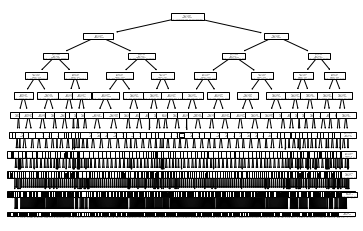

In [41]:
oh_my.plot_tree(tree)[0] # max_depth=10

In [44]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [52]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

target = data.Cover_Type
train = data.drop(['Cover_Type'], axis = 1)
models_results = []

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=16)
macro = []
micro = []
weighted = []
for depth in range(1, 50):
    tree = DecisionTreeClassifier(max_depth=depth)
    
    print("Depth = ", depth)
    print()

    start_time = time.time()
    tree.fit(x_train, y_train)
    tree_train_time = time.time() - start_time
    print("DecisionTreeClassifier train time = {} seconds".format(tree_train_time))

    start_time = time.time()
    tree_result = tree.predict(x_test)
    tree_predict_time = time.time() - start_time
    print("DecisionTreeClassifier predict time = {} seconds".format(tree_predict_time))

    tree_model_f1 = f1_score(y_test, tree_result, average='weighted')
    print("DecisionTreeClassifier f1 (weighted): ", tree_model_f1)

    tree_model_f1_micro = f1_score(y_test, tree_result, average='micro')
    print("DecisionTreeClassifier f1 (micro): ", tree_model_f1_micro)

    tree_model_f1_macro = f1_score(y_test, tree_result, average='macro')
    print("DecisionTreeClassifier f1 (macro): \n", tree_model_f1_macro)

    print(classification_report(y_test, tree_result))
    weighted.append(tree_model_f1)
    macro.append(tree_model_f1_macro)
    micro.append(tree_model_f1_micro)

Depth =  1

DecisionTreeClassifier train time = 0.7474932670593262 seconds
DecisionTreeClassifier predict time = 0.050718069076538086 seconds
DecisionTreeClassifier f1 (weighted):  0.5813652242244151
DecisionTreeClassifier f1 (micro):  0.6318699097436886
DecisionTreeClassifier f1 (macro): 
 0.19464659292425887
              precision    recall  f1-score   support

           1       0.63      0.73      0.67     52801
           2       0.63      0.75      0.69     70969
           3       0.00      0.00      0.00      8929
           4       0.00      0.00      0.00       712
           5       0.00      0.00      0.00      2396
           6       0.00      0.00      0.00      4391
           7       0.00      0.00      0.00      5055

    accuracy                           0.63    145253
   macro avg       0.18      0.21      0.19    145253
weighted avg       0.54      0.63      0.58    145253

Depth =  2

DecisionTreeClassifier train time = 0.9136111736297607 seconds
DecisionTreeClas

DecisionTreeClassifier f1 (macro): 
 0.6592832264545143
              precision    recall  f1-score   support

           1       0.75      0.77      0.76     52801
           2       0.79      0.82      0.81     70969
           3       0.74      0.86      0.80      8929
           4       0.85      0.67      0.75       712
           5       0.82      0.22      0.34      2396
           6       0.72      0.24      0.36      4391
           7       0.87      0.72      0.79      5055

    accuracy                           0.78    145253
   macro avg       0.79      0.62      0.66    145253
weighted avg       0.78      0.78      0.77    145253

Depth =  11

DecisionTreeClassifier train time = 4.384833097457886 seconds
DecisionTreeClassifier predict time = 0.050122976303100586 seconds
DecisionTreeClassifier f1 (weighted):  0.7887538919560871
DecisionTreeClassifier f1 (micro):  0.7928855169944855
DecisionTreeClassifier f1 (macro): 
 0.6972585809060975
              precision    recall  f

              precision    recall  f1-score   support

           1       0.91      0.88      0.89     52801
           2       0.89      0.93      0.91     70969
           3       0.92      0.89      0.90      8929
           4       0.86      0.80      0.83       712
           5       0.80      0.58      0.67      2396
           6       0.82      0.79      0.80      4391
           7       0.94      0.92      0.93      5055

    accuracy                           0.90    145253
   macro avg       0.88      0.83      0.85    145253
weighted avg       0.90      0.90      0.90    145253

Depth =  20

DecisionTreeClassifier train time = 7.420273065567017 seconds
DecisionTreeClassifier predict time = 0.08151817321777344 seconds
DecisionTreeClassifier f1 (weighted):  0.9067661406744116
DecisionTreeClassifier f1 (micro):  0.907334099812052
DecisionTreeClassifier f1 (macro): 
 0.8617433338077775
              precision    recall  f1-score   support

           1       0.92      0.89      

DecisionTreeClassifier train time = 7.29890513420105 seconds
DecisionTreeClassifier predict time = 0.07886219024658203 seconds
DecisionTreeClassifier f1 (weighted):  0.9348010907532146
DecisionTreeClassifier f1 (micro):  0.9348722573716205
DecisionTreeClassifier f1 (macro): 
 0.8954816102071093
              precision    recall  f1-score   support

           1       0.94      0.93      0.93     52801
           2       0.94      0.95      0.94     70969
           3       0.93      0.93      0.93      8929
           4       0.85      0.83      0.84       712
           5       0.82      0.79      0.80      2396
           6       0.88      0.87      0.88      4391
           7       0.94      0.94      0.94      5055

    accuracy                           0.93    145253
   macro avg       0.90      0.89      0.90    145253
weighted avg       0.93      0.93      0.93    145253

Depth =  30

DecisionTreeClassifier train time = 7.428719997406006 seconds
DecisionTreeClassifier predict t

DecisionTreeClassifier f1 (macro): 
 0.89990920603696
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     52801
           2       0.95      0.95      0.95     70969
           3       0.93      0.93      0.93      8929
           4       0.86      0.82      0.84       712
           5       0.82      0.82      0.82      2396
           6       0.88      0.88      0.88      4391
           7       0.94      0.94      0.94      5055

    accuracy                           0.94    145253
   macro avg       0.90      0.90      0.90    145253
weighted avg       0.94      0.94      0.94    145253

Depth =  39

DecisionTreeClassifier train time = 7.046592950820923 seconds
DecisionTreeClassifier predict time = 0.07461309432983398 seconds
DecisionTreeClassifier f1 (weighted):  0.9369959219678955
DecisionTreeClassifier f1 (micro):  0.9370064645824872
DecisionTreeClassifier f1 (macro): 
 0.900275617850495
              precision    recall  f1-sc

              precision    recall  f1-score   support

           1       0.94      0.94      0.94     52801
           2       0.95      0.95      0.95     70969
           3       0.93      0.93      0.93      8929
           4       0.85      0.82      0.84       712
           5       0.82      0.83      0.82      2396
           6       0.88      0.88      0.88      4391
           7       0.94      0.95      0.94      5055

    accuracy                           0.94    145253
   macro avg       0.90      0.90      0.90    145253
weighted avg       0.94      0.94      0.94    145253

Depth =  48

DecisionTreeClassifier train time = 8.533941984176636 seconds
DecisionTreeClassifier predict time = 0.08589291572570801 seconds
DecisionTreeClassifier f1 (weighted):  0.9374579655149925
DecisionTreeClassifier f1 (micro):  0.9374677287216099
DecisionTreeClassifier f1 (macro): 
 0.8994444422958331
              precision    recall  f1-score   support

           1       0.94      0.94     

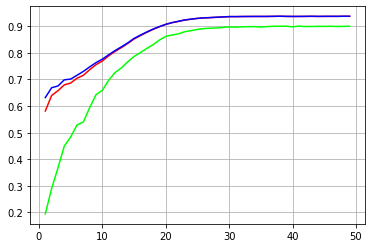

In [54]:
pyplot.grid(True)
x = range(1, 50)
pyplot.plot(x, weighted, color='#FF0000', label='weighted')
pyplot.plot(x, macro, color='#00FF00', label='macro')
pyplot.plot(x, micro, color='#0000FF', label='micro')

Уже при глубине в 25 эффективность дерева перестет увеличиваться

In [15]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

target = data.Cover_Type
train = data.drop(['Cover_Type'], axis = 1)
models_results = []

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=16)
# macro = []
# micro = []
# weighted = []
# for depth in range(1, 50):
tree = DecisionTreeClassifier(max_depth=5)

print()

start_time = time.time()
t = tree.fit(x_train, y_train)
tree_train_time = time.time() - start_time
print("DecisionTreeClassifier train time = {} seconds".format(tree_train_time))
print(t.tree_.max_depth)


start_time = time.time()
tree_result = tree.predict(x_test)
tree_predict_time = time.time() - start_time
print("DecisionTreeClassifier predict time = {} seconds".format(tree_predict_time))

tree_model_f1 = f1_score(y_test, tree_result, average='weighted')
print("DecisionTreeClassifier f1 (weighted): ", tree_model_f1)

tree_model_f1_micro = f1_score(y_test, tree_result, average='micro')
print("DecisionTreeClassifier f1 (micro): ", tree_model_f1_micro)

tree_model_f1_macro = f1_score(y_test, tree_result, average='macro')
print("DecisionTreeClassifier f1 (macro): \n", tree_model_f1_macro)

print(classification_report(y_test, tree_result))
#     weighted.append(tree_model_f1)
#     macro.append(tree_model_f1_macro)
#     micro.append(tree_model_f1_micro)


DecisionTreeClassifier train time = 2.3192811012268066 seconds
5
DecisionTreeClassifier predict time = 0.04992508888244629 seconds
DecisionTreeClassifier f1 (weighted):  0.6864675522734364
DecisionTreeClassifier f1 (micro):  0.7014106421209889
DecisionTreeClassifier f1 (macro): 
 0.48372056340758307
              precision    recall  f1-score   support

           1       0.68      0.69      0.68     52801
           2       0.74      0.77      0.75     70969
           3       0.63      0.86      0.73      8929
           4       0.58      0.43      0.50       712
           5       0.47      0.05      0.09      2396
           6       0.46      0.04      0.07      4391
           7       0.68      0.49      0.57      5055

    accuracy                           0.70    145253
   macro avg       0.60      0.48      0.48    145253
weighted avg       0.69      0.70      0.69    145253



По умолчанию глубина равна 42

In [60]:
y_train.name

'Cover_Type'

In [16]:
import graphviz 
from sklearn import tree as tr
dot_data = tr.export_graphviz(tree, out_file=None, 
                     feature_names=x_train.columns,  
                     class_names=y_train.name,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("tree")

'tree.pdf'

In [20]:
type(graph)

graphviz.files.Source

In [21]:
print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Elevation &le; 3044.5<br/>gini = 0.623<br/>samples = 435759<br/>value = [159039, 212332, 26825, 2035, 7097, 12976, 15455]<br/>class = o>, fillcolor="#f1fad9"] ;
1 [label=<Elevation &le; 2510.5<br/>gini = 0.553<br/>samples = 252566<br/>value = [43136, 160432, 26825, 2035, 7097, 12976, 65]<br/>class = o>, fillcolor="#d7f090"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Elevation &le; 2431.5<br/>gini = 0.581<br/>samples = 31949<br/>value = [7, 2492, 18375, 2034, 106, 8935, 0]<br/>class = v>, fillcolor="#aef4b6"] ;
1 -> 2 ;
3 [label=<Horizontal_Distance_To_Hydrology &le; 15.0<br/>gini = 0.539<br/>samples = 24114<br/>value = [0, 685, 14856, 2009, 0, 6564, 0]<br/>class = v>, fillcolor="#a1f3ab"] ;
2 -> 3 ;
4 [label=<Wilderness_Area4 &le; 0.5<br/>gini = 0.663<br/>samples = 1756<br/>value = [0, 64, 529, 779, 0, 384, 0]<br/>class = e>,

In [47]:
from sklearn import tree as oh_my
dotfile = open("dtree_data.dot", 'w')
oh_my.export_graphviz(tree, out_file = dotfile, feature_names = x_train.columns)
dotfile.close()

In [26]:
ct = pd.cut(data.Elevation, [0, 3044.5, 5000])
data.groupby(ct).count()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(0.0, 3044.5]",336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915,336915
"(3044.5, 5000.0]",244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097,244097
